# PCA 튜토리얼
- PCA(Principal Component Analysis)는 고차원의 데이터를 저차원으로 축소하는 대표적인 차원 축소 기법입니다.
- 데이터의 분산을 최대한 보존하면서 서로 직교하는 새 축을 찾아 고차원 공간의 데이터를 선형 연관성이 없는 저차원 공간으로 변환합니다.
- PCA의 주요 목적:
    + 차원 축소를 통한 데이터 압축
    + 노이즈 제거
    + 데이터 시각화
    + 특징 추출

['NanumGothic'] 10.0


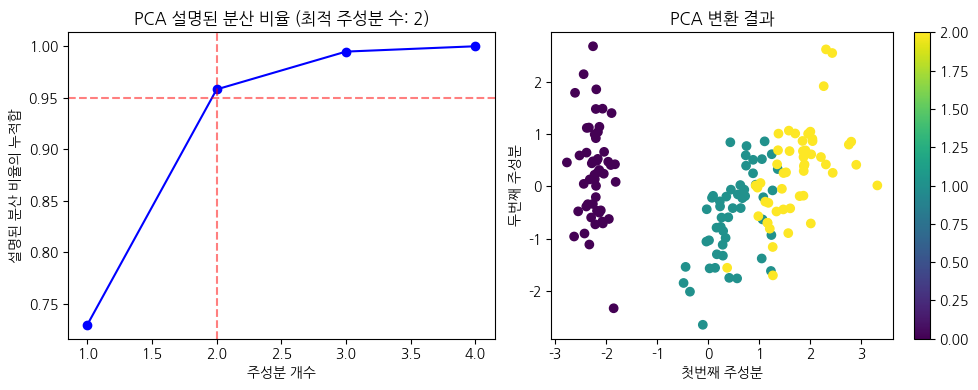

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib as mpl

plt.rcParams['font.family'] = 'NanumGothic'    #사용 방법1
print(plt.rcParams['font.family'], plt.rcParams['font.size'])   # 폰트확인
mpl.rcParams['axes.unicode_minus'] = False

def visualize_pca_components(X, y, feature_names):
    """
    PCA 결과를 시각화하는 함수
    
    Parameters:
    -----------
    X : array-like
        입력 데이터
    y : array-like 
        타겟 데이터
    feature_names : list
        특성 이름 리스트
    """
    # 데이터 스케일링
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # PCA 수행
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)
    
    # 설명된 분산 비율 시각화
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    # 주성분 개수에 따른 설명된 분산 비율의 누적합 계산
    explained_variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)
    
    # 95% 이상의 분산을 설명하는 최소 주성분 개수 찾기
    n_components_95 = np.argmax(explained_variance_ratio_cumsum >= 0.95) + 1
    
    # 라인 차트 그리기
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
             explained_variance_ratio_cumsum, 'bo-')
    
    # 95% 지점 표시
    plt.axhline(y=0.95, color='r', linestyle='--', alpha=0.5)
    plt.axvline(x=n_components_95, color='r', linestyle='--', alpha=0.5)
    
    plt.xlabel('주성분 개수')
    plt.ylabel('설명된 분산 비율의 누적합')
    plt.title(f'PCA 설명된 분산 비율 (최적 주성분 수: {n_components_95})')
    
    # 첫 두 개의 주성분으로 데이터 산점도 시각화
    plt.subplot(1, 2, 2)
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
    plt.xlabel('첫번째 주성분')
    plt.ylabel('두번째 주성분')
    plt.title('PCA 변환 결과')
    plt.colorbar(scatter)
    
    plt.tight_layout()
    plt.show()

# iris 데이터 로드
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# PCA 시각화 함수 호출
visualize_pca_components(X, y, feature_names)


In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 데이터 로드
iris = load_iris()
X = iris.data
y = iris.target

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 적용 (2개의 주성분으로 축소)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 원본 차원으로 재구성
X_reconstructed = pca.inverse_transform(X_pca)

# 재구성 오차 계산
reconstruction_error = np.mean(np.square(X_scaled - X_reconstructed), axis=1)

# 이상치 임계값 설정 (예: 평균 + 2 * 표준편차)
threshold = np.mean(reconstruction_error) + 2 * np.std(reconstruction_error)
outliers = reconstruction_error > threshold

# 시각화
plt.figure(figsize=(12, 5))

# 원본 데이터와 재구성된 데이터 비교 (첫 번째 특성)
plt.subplot(121)
plt.scatter(X_scaled[~outliers, 0], X_scaled[~outliers, 1], c=y[~outliers], label='Normal')
plt.scatter(X_scaled[outliers, 0], X_scaled[outliers, 1], c='red', label='Outliers')
plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], c=y, marker='x', label='Reconstructed')
plt.title('Original vs Reconstructed Data (Red: Outliers)')
plt.legend()

# 재구성 오차 분포
plt.subplot(122)
plt.hist(reconstruction_error[~outliers], bins=30, alpha=0.5, color='blue', label='Normal')
plt.hist(reconstruction_error[outliers], bins=30, alpha=0.5, color='red', label='Outliers')
plt.axvline(x=threshold, color='r', linestyle='--', label='Threshold')
plt.title('Distribution of Reconstruction Error')
plt.xlabel('Reconstruction Error')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()

print(f"평균 재구성 오차: {np.mean(reconstruction_error):.4f}")
print(f"설명된 분산 비율: {pca.explained_variance_ratio_}")
print(f"이상치 개수: {np.sum(outliers)}")

ModuleNotFoundError: No module named 'numpy'

# 범죄데이터셋 활용

In [13]:
# US Arrests 데이터셋 생성 (R의 USArrests 데이터와 동일)
import pandas as pd
import numpy as np

# 1973년 미국 주별 범죄율 데이터 생성
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
          'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
          'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
          'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
          'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
          'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
          'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia',
          'Wisconsin', 'Wyoming']

# 실제 1973년 데이터
data = {
    'Murder': [13.2, 10.0, 8.1, 8.8, 9.0, 7.9, 3.3, 5.9, 15.4, 17.4, 5.3, 2.6, 10.4, 7.2,
               2.2, 6.0, 9.7, 15.4, 2.1, 11.3, 4.4, 12.1, 2.7, 16.1, 9.0, 6.0, 4.3, 12.2,
               2.1, 5.2, 11.4, 11.1, 13.0, 0.8, 7.3, 6.6, 4.9, 6.3, 3.4, 14.4, 3.8, 13.2,
               12.7, 3.2, 2.2, 8.5, 4.0, 5.7, 2.6, 6.8],
    'Assault': [236, 263, 294, 190, 276, 204, 110, 238, 335, 211, 46, 120, 249, 113, 56,
                115, 109, 249, 83, 300, 149, 255, 72, 259, 178, 109, 102, 252, 57, 159,
                285, 254, 337, 45, 120, 151, 159, 106, 174, 279, 86, 188, 201, 120, 48,
                156, 145, 81, 53, 161],
    'UrbanPop': [58, 48, 80, 50, 91, 78, 77, 72, 80, 60, 83, 54, 83, 65, 57, 66, 52, 66,
                 51, 67, 85, 74, 66, 44, 70, 53, 62, 81, 56, 89, 70, 86, 45, 44, 75, 68,
                 67, 72, 87, 48, 45, 59, 80, 80, 32, 63, 73, 39, 66, 60],
    'Rape': [21.2, 44.5, 31.0, 19.5, 40.6, 38.7, 11.1, 15.8, 31.9, 25.8, 20.2, 14.2, 24.0,
             21.0, 11.3, 18.0, 16.3, 22.2, 7.8, 27.8, 16.3, 35.1, 14.9, 17.1, 28.2, 16.4,
             16.5, 46.0, 9.5, 18.8, 32.1, 26.1, 16.1, 7.3, 21.4, 20.0, 29.3, 14.9, 8.3,
             22.5, 12.8, 26.9, 25.5, 22.9, 11.2, 20.7, 26.2, 9.0, 10.8, 15.6]
}

# DataFrame 생성
arrests_df = pd.DataFrame(data, index=states)
arrests_df.to_csv('USArrests.csv', index=True)


In [15]:
# USArrests.csv 파일 로드
USArrests = pd.read_csv('USArrests.csv', index_col=0)
USArrests.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


# 다른 예제 데이터셋 사용

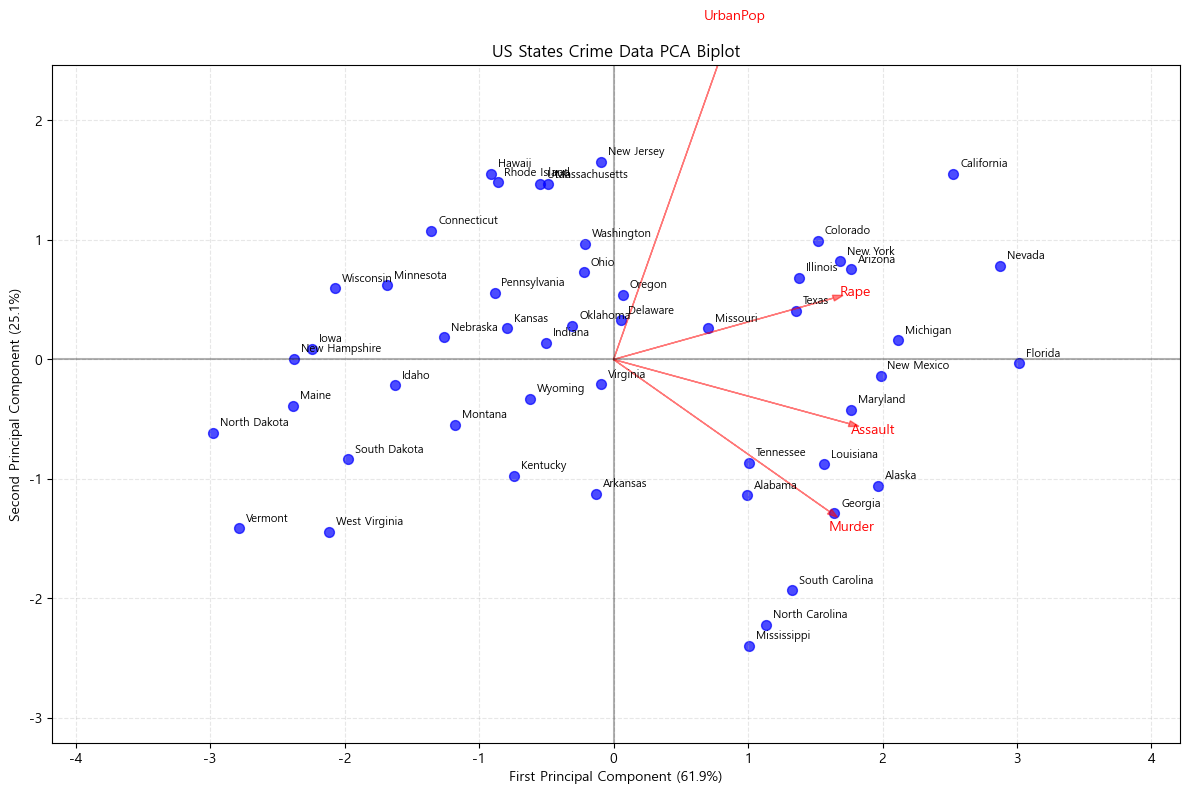


PCA 설명된 분산 비율:
[0.61877284 0.25053334 0.08779703 0.0428968 ]


In [26]:
def create_pca_biplot(data, features):
    # 데이터 스케일링
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data[features])
    
    # PCA 수행
    pca = PCA()
    pca_result = pca.fit_transform(scaled_data)
    
    # 부호 조정: 첫 번째 주성분의 가장 큰 절댓값을 가진 로딩이 양수가 되도록
    for i in range(pca.components_.shape[0]):
        max_abs_idx = np.argmax(np.abs(pca.components_[i]))
        if pca.components_[i, max_abs_idx] < 0:
            pca.components_[i] *= -1
            pca_result[:, i] *= -1
    
    # Biplot 생성
    plt.figure(figsize=(12, 8))
    
    # 한글 폰트 설정
    plt.rcParams['font.family'] = 'Malgun Gothic'
    
    # States 플롯
    plt.scatter(pca_result[:, 0], pca_result[:, 1], 
               alpha=0.7, 
               color='blue',
               s=50)  # 점 크기 조정
    
    # State 이름 추가
    for i, state in enumerate(data.index):
        plt.annotate(state, 
                    (pca_result[i, 0], pca_result[i, 1]),
                    xytext=(5, 5),
                    textcoords='offset points',
                    fontsize=8)
    
    # 변수 벡터 추가
    n = pca.components_.shape[1]
    for i in range(n):
        plt.arrow(0, 0,
                 pca.components_[0, i] * 3,  # 화살표 크기 조정
                 pca.components_[1, i] * 3,  # 화살표 크기 조정
                 color='red',
                 alpha=0.5,
                 head_width=0.05)
        
        # 변수 이름 추가 (화살표 끝에)
        plt.text(pca.components_[0, i] * 3.3,  # 텍스트 위치 조정
                pca.components_[1, i] * 3.3,  # 텍스트 위치 조정
                features[i],
                color='red',
                ha='center',
                va='center')
    
    # 축 레이블 (설명된 분산 비율 포함)
    plt.xlabel(f'First Principal Component ({pca.explained_variance_ratio_[0]:.1%})')
    plt.ylabel(f'Second Principal Component ({pca.explained_variance_ratio_[1]:.1%})')
    
    # 그리드 추가
    plt.grid(True, linestyle='--', alpha=0.3)
    
    # 원점에 십자선 추가
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    
    # 축 범위 자동 조정 (데이터 포인트 기준)
    margin = 0.2  # 여백 비율
    x_min, x_max = np.min(pca_result[:, 0]), np.max(pca_result[:, 0])
    y_min, y_max = np.min(pca_result[:, 1]), np.max(pca_result[:, 1])
    x_range = x_max - x_min
    y_range = y_max - y_min
    plt.xlim(x_min - margin * x_range, x_max + margin * x_range)
    plt.ylim(y_min - margin * y_range, y_max + margin * y_range)
    
    plt.title('US States Crime Data PCA Biplot')
    plt.tight_layout()
    plt.show()
    
    return pca, pca_result

# USArrests 데이터셋 사용
arrests_df = pd.read_csv('USArrests.csv', index_col=0)

# 특성 리스트
features = ['Murder', 'Assault', 'UrbanPop', 'Rape']

# Biplot 생성 및 결과 저장
pca, pca_result = create_pca_biplot(arrests_df, features)

print("\nPCA 설명된 분산 비율:")
print(pca.explained_variance_ratio_)

데이터 형태: (20640, 8)

특성 이름: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

처음 5개의 샘플:
[[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
   3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00
   4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02]
 [ 5.64310000e+00  5.20000000e+01  5.81735160e+00  1.07305936e+00
   5.58000000e+02  2.54794521e+00  3.78500000e+01 -1.22250000e+02]
 [ 3.84620000e+00  5.20000000e+01  6.28185328e+00  1.08108108e+00
   5.65000000e+02  2.18146718e+00  3.78500000e+01 -1.22250000e+02]]


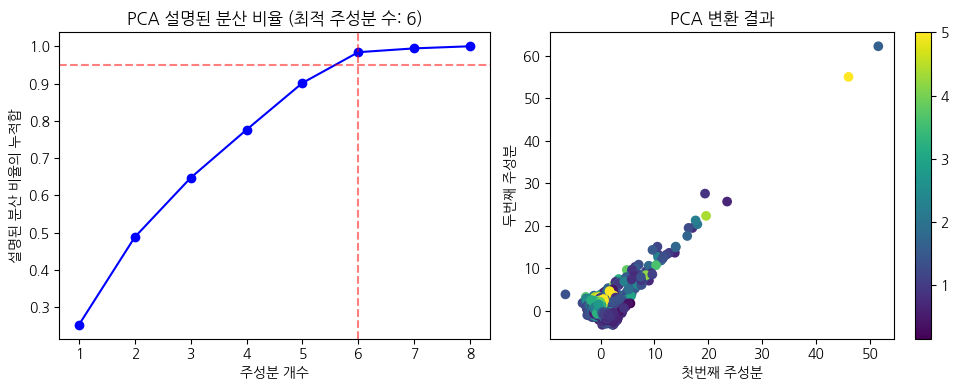

In [6]:
# California 주택 가격 데이터셋 로드 
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
X = housing.data
y = housing.target
feature_names = housing.feature_names

print("데이터 형태:", X.shape)
print("\n특성 이름:", feature_names)
print("\n처음 5개의 샘플:")
print(X[:5])

# PCA 시각화 함수 호출
visualize_pca_components(X, y, feature_names)



C:\Users\campus3S043\AppData\Local\Temp\ipykernel_19440\3096649715.py:113: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\campus3S043\Desktop\alpaco_lectures\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


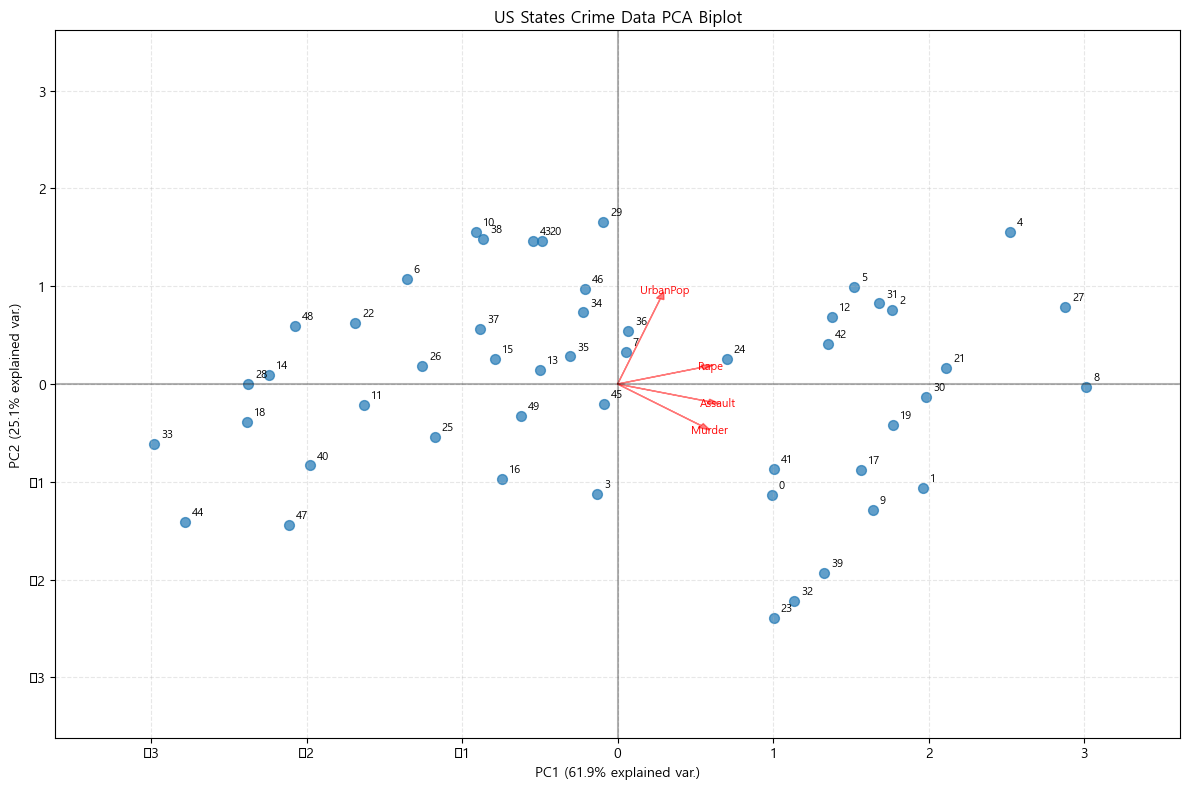

C:\Users\campus3S043\AppData\Local\Temp\ipykernel_19440\3096649715.py:113: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\campus3S043\Desktop\alpaco_lectures\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


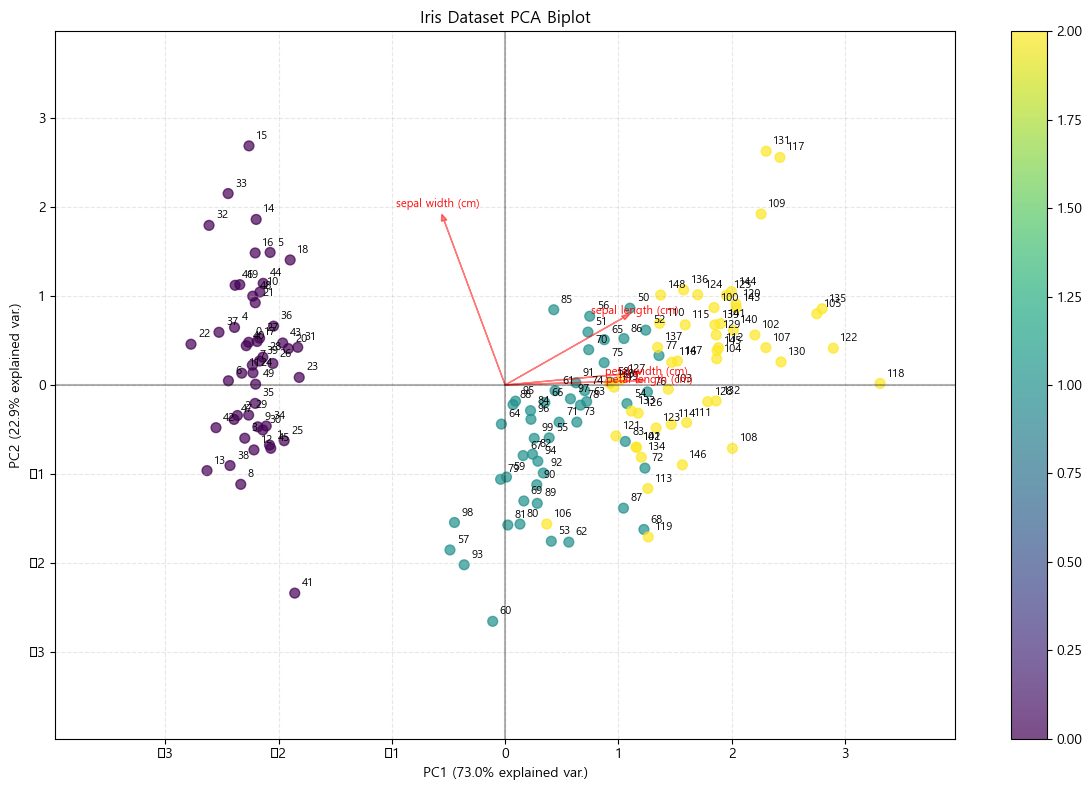


USArrests 데이터 PCA 설명된 분산 비율:
[0.61877284 0.25053334 0.08779703 0.0428968 ]

Iris 데이터 PCA 설명된 분산 비율:
[0.72962445 0.22850762 0.03668922 0.00517871]


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def create_general_biplot(data, features=None, target=None, 
                         scale_arrows=1, figsize=(12, 8),
                         title='PCA Biplot',
                         point_size=50,
                         text_offset=0.1,
                         font_size=8):
    """
    일반화된 PCA Biplot 생성 함수
    
    Parameters:
    -----------
    data : DataFrame or array-like
        분석할 데이터
    features : list, optional
        사용할 특성(컬럼) 이름 리스트. None이면 모든 컬럼 사용
    target : array-like, optional
        색상 구분에 사용할 타겟 변수
    scale_arrows : float, default=1
        화살표 크기 조절 계수
    figsize : tuple, default=(12, 8)
        그래프 크기
    title : str, default='PCA Biplot'
        그래프 제목
    point_size : int, default=50
        산점도 점 크기
    text_offset : float, default=0.1
        텍스트 위치 조정 계수
    font_size : int, default=8
        폰트 크기
    """
    # 데이터 준비
    if isinstance(data, pd.DataFrame):
        if features is None:
            features = data.columns.tolist()
        X = data[features]
        labels = data.index if data.index.name is not None else range(len(data))
    else:
        X = data
        features = features if features is not None else [f'Feature_{i}' for i in range(X.shape[1])]
        labels = range(len(X))
    
    # 데이터 스케일링
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # PCA 수행
    pca = PCA()
    pca_result = pca.fit_transform(X_scaled)
    
    # Biplot 생성
    plt.figure(figsize=figsize)
    
    # 한글 폰트 설정
    plt.rcParams['font.family'] = 'Malgun Gothic'
    
    # 산점도 그리기
    if target is not None:
        scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], 
                            c=target, cmap='viridis',
                            alpha=0.7, s=point_size)
        plt.colorbar(scatter)
    else:
        plt.scatter(pca_result[:, 0], pca_result[:, 1], 
                   alpha=0.7, s=point_size)
    
    # 데이터 포인트 레이블 추가
    for i, label in enumerate(labels):
        plt.annotate(str(label),
                    (pca_result[i, 0], pca_result[i, 1]),
                    xytext=(5, 5),
                    textcoords='offset points',
                    fontsize=font_size)
    
    # 변수 화살표 추가
    for i, feature in enumerate(features):
        coef = pca.components_[:2, i] * scale_arrows
        plt.arrow(0, 0,
                 coef[0], coef[1],
                 color='red',
                 alpha=0.5,
                 head_width=0.05)
        
        # 변수 이름 추가
        plt.text(coef[0] * (1 + text_offset),
                coef[1] * (1 + text_offset),
                feature,
                color='red',
                ha='center',
                va='center',
                fontsize=font_size)
    
    # 그래프 스타일링
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} explained var.)')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} explained var.)')
    plt.title(title)
    plt.grid(True, linestyle='--', alpha=0.3)
    
    # 원점 표시
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    
    # 축 범위 자동 조정
    max_range = np.abs(pca_result[:, :2]).max().max() * 1.2
    plt.xlim(-max_range, max_range)
    plt.ylim(-max_range, max_range)
    
    plt.tight_layout()
    plt.show()
    
    # PCA 결과 반환
    return {
        'pca_result': pca_result,
        'explained_variance_ratio': pca.explained_variance_ratio_,
        'components': pca.components_,
        'feature_names': features
    }

# 사용 예시 1: USArrests 데이터
arrests_df = pd.read_csv('USArrests.csv', index_col=0)
result1 = create_general_biplot(
    arrests_df,
    title='US States Crime Data PCA Biplot'
)

# 사용 예시 2: iris 데이터
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
result2 = create_general_biplot(
    iris_df,
    target=iris.target,
    title='Iris Dataset PCA Biplot',
    scale_arrows=2
)

# 결과 출력
print("\nUSArrests 데이터 PCA 설명된 분산 비율:")
print(result1['explained_variance_ratio'])

print("\nIris 데이터 PCA 설명된 분산 비율:")
print(result2['explained_variance_ratio'])

C:\Users\campus3S043\AppData\Local\Temp\ipykernel_19440\3096649715.py:113: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\campus3S043\Desktop\alpaco_lectures\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


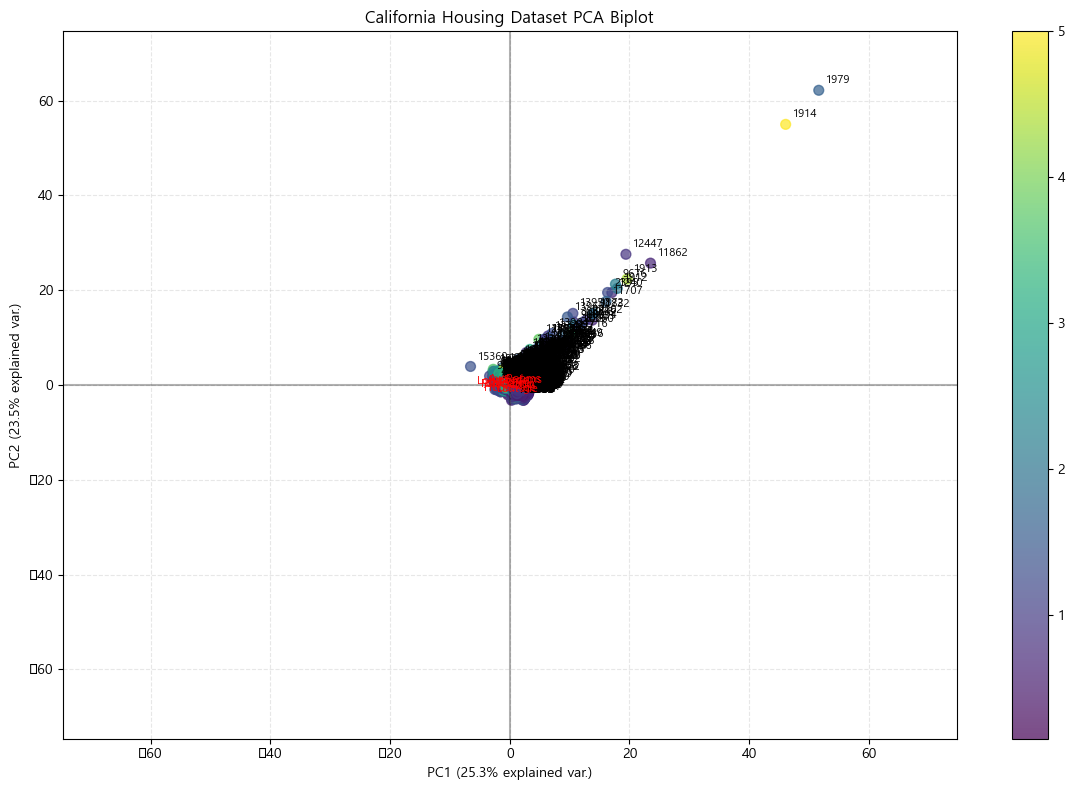


California Housing 데이터 PCA 설명된 분산 비율:
[0.25336868 0.23516245 0.15888635 0.12887971 0.12538195 0.0824225
 0.01020022 0.00569814]


In [20]:
# 주성분이 6개인 경우의 시각화
housing = fetch_california_housing()
X = housing.data
y = housing.target
feature_names = housing.feature_names

housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
result3 = create_general_biplot(
    housing_df,
    target=housing.target,
    title='California Housing Dataset PCA Biplot',
    scale_arrows=2
)

print("\nCalifornia Housing 데이터 PCA 설명된 분산 비율:")
print(result3['explained_variance_ratio'])

## 시각화 업데이트
- 주성분이 6개인 경우의 시각화 방법:
1. 2x3 격자로 각 주성분 쌍을 산점도로 표시
2. 주성분 설명력을 막대 그래프로 표시
3. 3D 산점도로 상위 3개 주성분 표시
4. 히트맵으로 주성분과 원본 특성 간의 상관관계 표시


C:\Users\campus3S043\AppData\Local\Temp\ipykernel_19440\2200858927.py:24: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  plt.tight_layout()
c:\Users\campus3S043\Desktop\alpaco_lectures\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


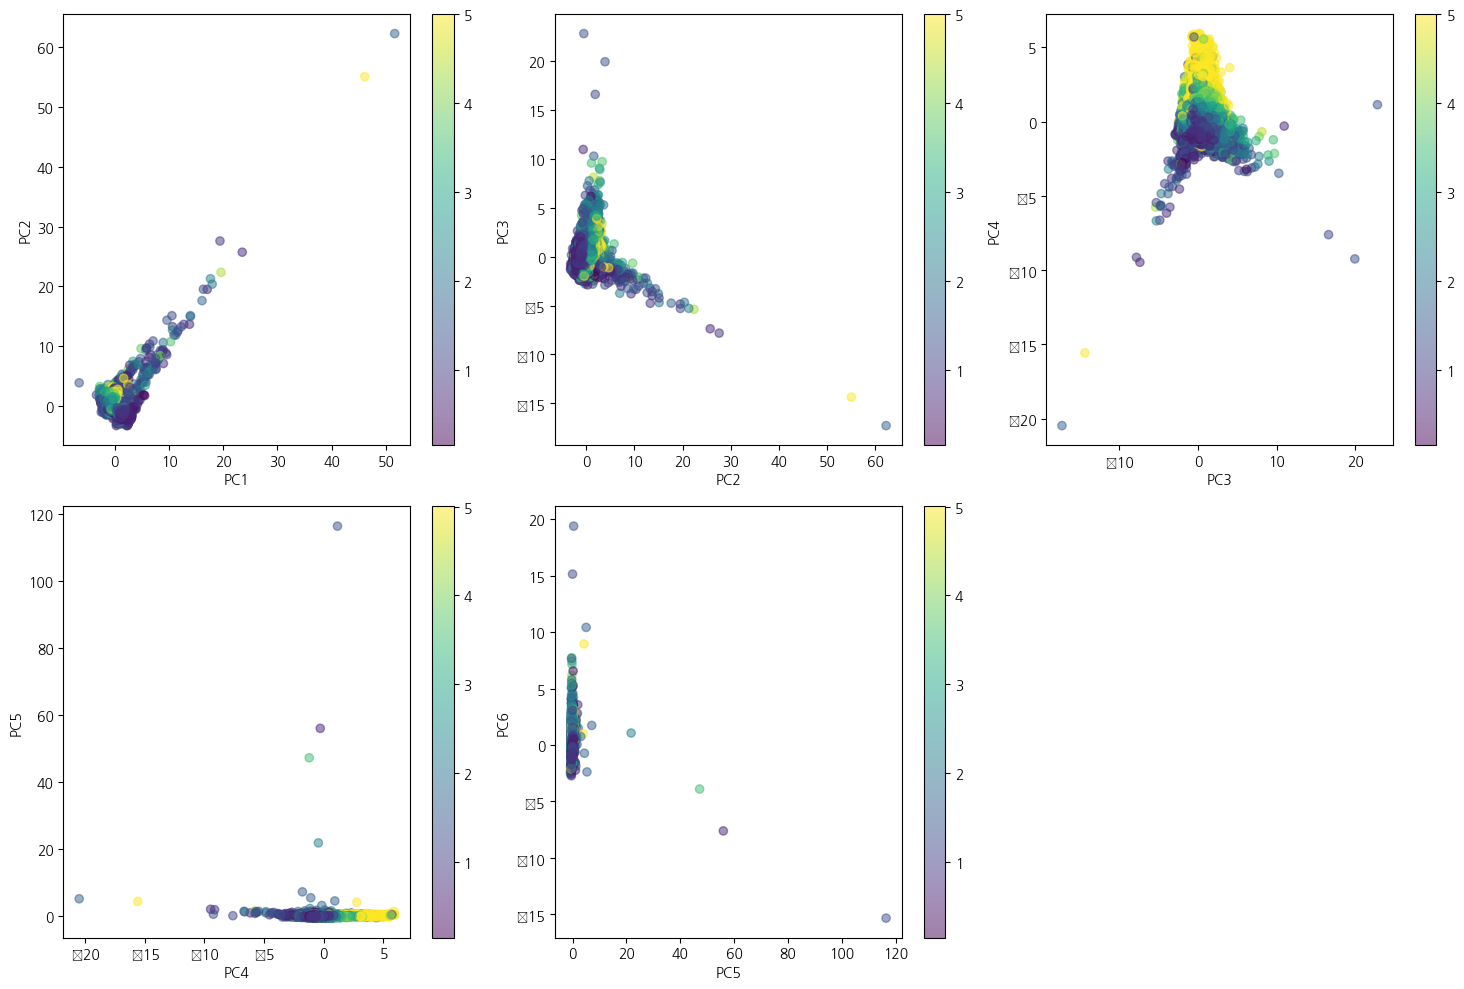

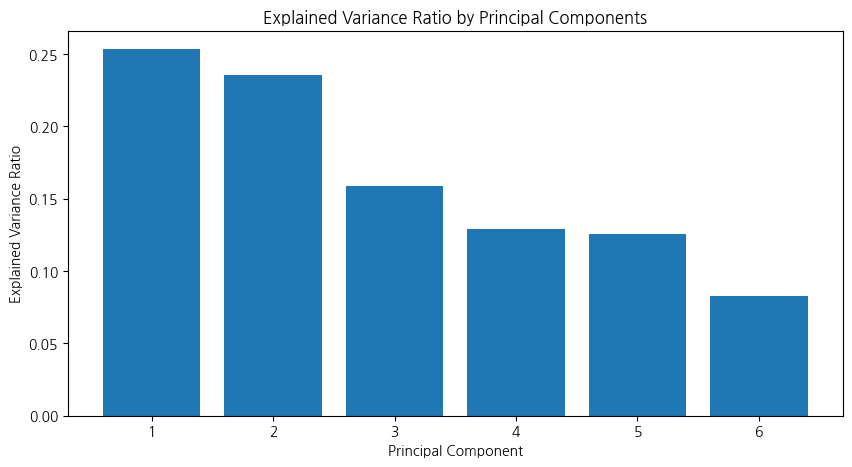

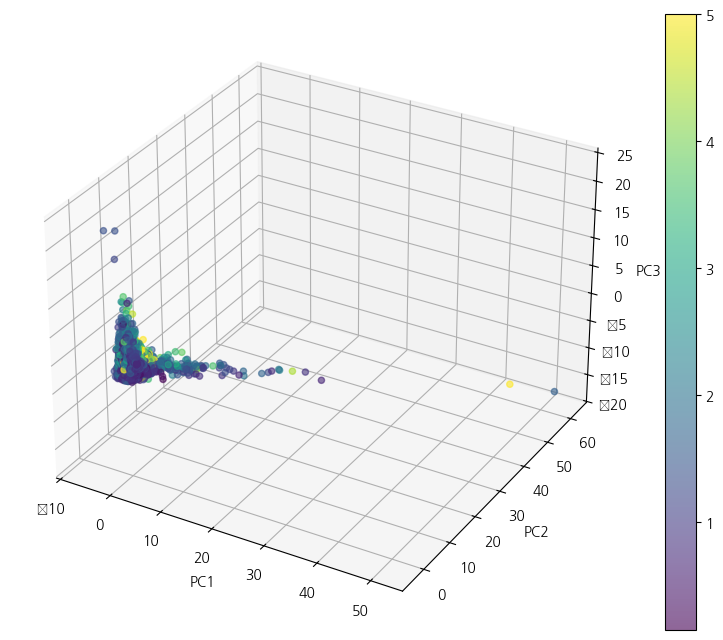

c:\Users\campus3S043\Desktop\alpaco_lectures\venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.draw()
c:\Users\campus3S043\Desktop\alpaco_lectures\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


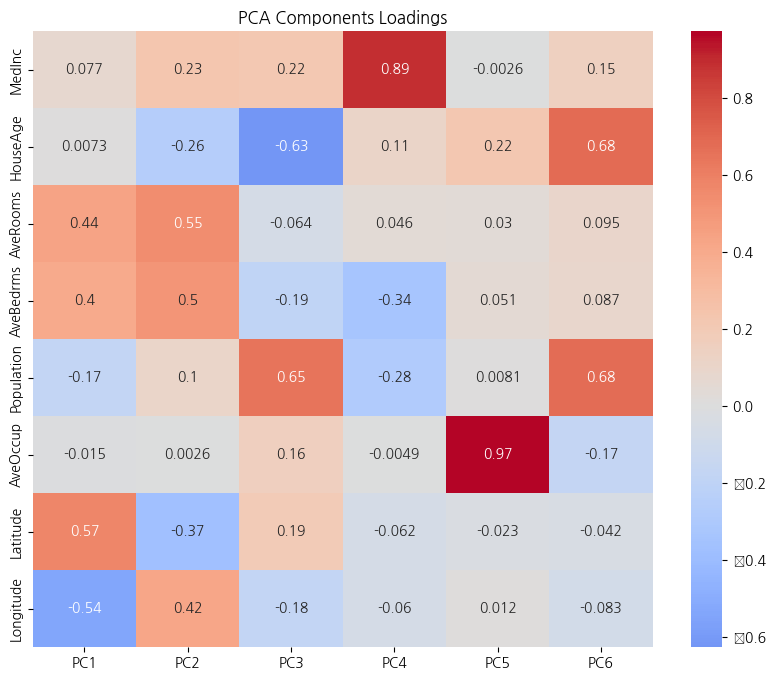

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def visualize_pca_components_extended(X, y, feature_names):
    # 데이터 스케일링
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # PCA 수행 (6개 성분)
    pca = PCA(n_components=6)
    X_pca = pca.fit_transform(X_scaled)
    
    # 1. 2x3 격자의 산점도
    fig = plt.figure(figsize=(15, 10))
    for i in range(5):
        plt.subplot(2, 3, i+1)
        plt.scatter(X_pca[:, i], X_pca[:, i+1], c=y, cmap='viridis', alpha=0.5)
        plt.xlabel(f'PC{i+1}')
        plt.ylabel(f'PC{i+2}')
        plt.colorbar()
    plt.tight_layout()
    plt.show()
    
    # 2. 설명된 분산 비율 막대 그래프
    plt.figure(figsize=(10, 5))
    explained_variance_ratio = pca.explained_variance_ratio_
    plt.bar(range(1, 7), explained_variance_ratio)
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance Ratio by Principal Components')
    plt.show()
    
    # 3. 상위 3개 주성분의 3D 산점도
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], 
                        c=y, cmap='viridis', alpha=0.6)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    plt.colorbar(scatter)
    plt.show()
    
    # 4. 주성분과 원본 특성 간의 상관관계 히트맵
    loadings = pca.components_
    loadings_df = pd.DataFrame(
        loadings.T,
        columns=[f'PC{i+1}' for i in range(6)],
        index=feature_names
    )
    plt.figure(figsize=(10, 8))
    sns.heatmap(loadings_df, annot=True, cmap='coolwarm', center=0)
    plt.title('PCA Components Loadings')
    plt.show()

# California 주택 데이터에 대해 확장된 PCA 시각화 수행
visualize_pca_components_extended(X, y, feature_names)


# 가상의 고객 데이터 생성
- 가상의 고객 데이터 분석 주제: 온라인 쇼핑몰 고객 행동 패턴 분석

# 분석할 고객 데이터 컬럼:
1. 총 구매금액 (Total Purchase Amount)
2. 방문 빈도 (Visit Frequency) 
3. 평균 체류시간 (Average Time Spent)
4. 장바구니 담은 횟수 (Cart Additions)
5. 위시리스트 추가 횟수 (Wishlist Additions)
6. 리뷰 작성 수 (Reviews Written)
7. 반품 횟수 (Returns)
8. 고객 서비스 문의 횟수 (Customer Service Inquiries)

- 분석 목표:
    + 고객들의 쇼핑 행동 패턴을 파악하여 주요 특성 도출
    + 유사한 행동 패턴을 보이는 고객 그룹 식별
    + 마케팅 전략 수립을 위한 인사이트 도출


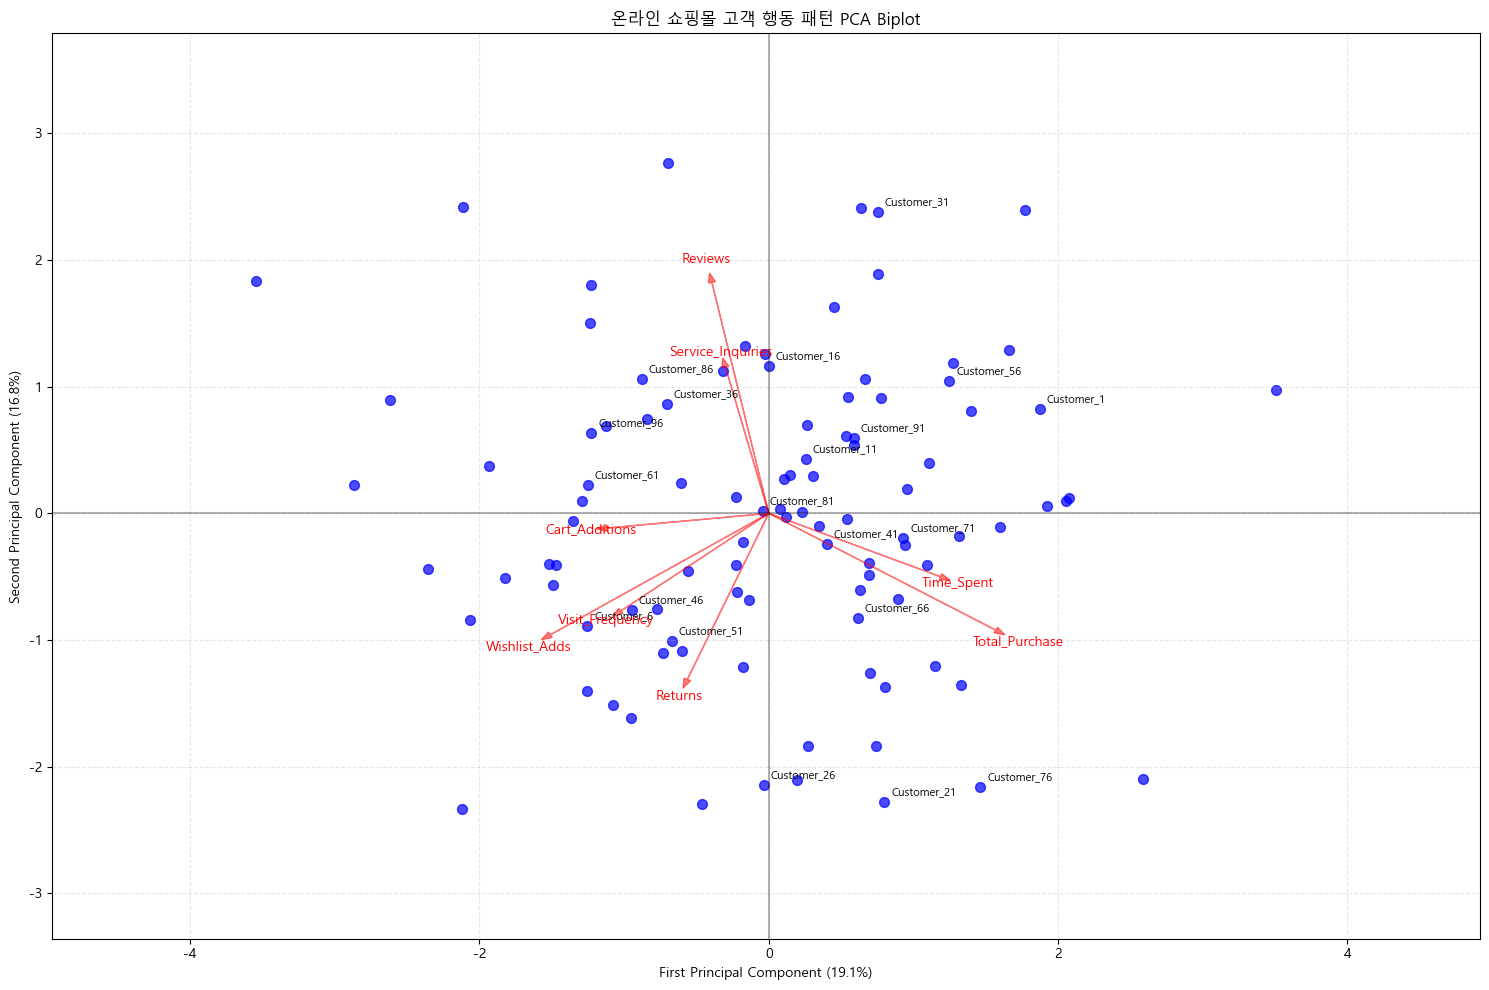


PCA 설명된 분산 비율:
[0.19138905 0.16763125 0.14523903 0.13310508 0.10008113 0.09482931
 0.08875528 0.07896988]

주성분 로딩:
                        PC1       PC2       PC3       PC4       PC5       PC6  \
Total_Purchase     0.522911 -0.307156 -0.074539 -0.101409  0.272660  0.351826   
Visit_Frequency   -0.340634 -0.256715  0.570867 -0.006475 -0.203306 -0.410186   
Time_Spent         0.395528 -0.166691  0.151908  0.617985  0.279002 -0.359434   
Cart_Additions    -0.372449 -0.038734 -0.437937  0.542549  0.252545 -0.127149   
Wishlist_Adds     -0.503104 -0.319450  0.010210  0.201167  0.073386  0.591458   
Reviews           -0.131015  0.607825 -0.283006 -0.117314  0.186184 -0.189438   
Returns           -0.187521 -0.436927 -0.192487 -0.508968  0.556419 -0.354311   
Service_Inquiries -0.099642  0.384788  0.580036  0.011445  0.626937  0.226629   

                        PC7       PC8  
Total_Purchase     0.502250  0.407430  
Visit_Frequency    0.452457  0.278982  
Time_Spent         0.092331 -0.441

In [28]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 가상의 고객 데이터 생성
np.random.seed(42)
n_customers = 100

# 고객 이름 생성
customer_names = [f'Customer_{i+1}' for i in range(n_customers)]

# 데이터 생성
data = {
    'Total_Purchase': np.random.normal(1000, 300, n_customers),  # 총 구매금액
    'Visit_Frequency': np.random.normal(20, 5, n_customers),     # 방문 빈도
    'Time_Spent': np.random.normal(30, 10, n_customers),        # 평균 체류시간
    'Cart_Additions': np.random.normal(15, 5, n_customers),     # 장바구니 담은 횟수
    'Wishlist_Adds': np.random.normal(10, 3, n_customers),      # 위시리스트 추가 횟수
    'Reviews': np.random.normal(5, 2, n_customers),             # 리뷰 작성 수
    'Returns': np.random.normal(2, 1, n_customers),             # 반품 횟수
    'Service_Inquiries': np.random.normal(3, 1, n_customers)    # 고객 서비스 문의 횟수
}

# 음수값 제거 (현실적인 데이터로 만들기)
for key in data:
    data[key] = np.maximum(data[key], 0)

# DataFrame 생성
df = pd.DataFrame(data, index=customer_names)

# 특성 이름 리스트
features = list(data.keys())

def create_pca_biplot(data, features):
    # 데이터 스케일링
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data[features])
    
    # PCA 수행
    pca = PCA()
    pca_result = pca.fit_transform(scaled_data)
    
    # 부호 조정
    for i in range(pca.components_.shape[0]):
        max_abs_idx = np.argmax(np.abs(pca.components_[i]))
        if pca.components_[i, max_abs_idx] < 0:
            pca.components_[i] *= -1
            pca_result[:, i] *= -1
    
    # Biplot 생성
    plt.figure(figsize=(15, 10))
    
    # 한글 폰트 설정
    plt.rcParams['font.family'] = 'Malgun Gothic'
    
    # 고객 포인트 플롯
    plt.scatter(pca_result[:, 0], pca_result[:, 1], 
               alpha=0.7, 
               color='blue',
               s=50)
    
    # 일부 고객 이름만 표시 (가독성을 위해)
    for i in range(0, len(data.index), 5):  # 5개마다 하나씩 표시
        plt.annotate(data.index[i], 
                    (pca_result[i, 0], pca_result[i, 1]),
                    xytext=(5, 5),
                    textcoords='offset points',
                    fontsize=8)
    
    # 변수 벡터 추가
    n = pca.components_.shape[1]
    for i in range(n):
        plt.arrow(0, 0,
                 pca.components_[0, i] * 3,
                 pca.components_[1, i] * 3,
                 color='red',
                 alpha=0.5,
                 head_width=0.05)
        
        plt.text(pca.components_[0, i] * 3.3,
                pca.components_[1, i] * 3.3,
                features[i],
                color='red',
                ha='center',
                va='center')
    
    # 축 레이블
    plt.xlabel(f'First Principal Component ({pca.explained_variance_ratio_[0]:.1%})')
    plt.ylabel(f'Second Principal Component ({pca.explained_variance_ratio_[1]:.1%})')
    
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    
    # 축 범위 자동 조정
    margin = 0.2
    x_min, x_max = np.min(pca_result[:, 0]), np.max(pca_result[:, 0])
    y_min, y_max = np.min(pca_result[:, 1]), np.max(pca_result[:, 1])
    x_range = x_max - x_min
    y_range = y_max - y_min
    plt.xlim(x_min - margin * x_range, x_max + margin * x_range)
    plt.ylim(y_min - margin * y_range, y_max + margin * y_range)
    
    plt.title('온라인 쇼핑몰 고객 행동 패턴 PCA Biplot')
    plt.tight_layout()
    plt.show()
    
    return pca, pca_result

# Biplot 생성 및 결과 저장
pca, pca_result = create_pca_biplot(df, features)

# PCA 결과 분석
print("\nPCA 설명된 분산 비율:")
print(pca.explained_variance_ratio_)

# 주성분과 원본 변수 간의 상관관계 (loadings)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(features))],
    index=features
)
print("\n주성분 로딩:")
print(loadings)

# 상위 고객 분석
pc1_scores = pd.DataFrame({
    'Customer': df.index,
    'PC1_Score': pca_result[:, 0]
})
print("\nPC1 기준 상위 10명 고객:")
print(pc1_scores.nlargest(10, 'PC1_Score'))